In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [3]:
heart_df=pd.read_csv("/Users/lakrama/Detection and Estimation Theory/Final Project/EE542-Final-Project/Logistic Regression/Real Data/Data/framingham.csv")
heart_df.head()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
heart_df.rename(columns={'male':'Sex_male'},inplace=True)

### <font color=CornflowerBlue>Missing values<font>

In [5]:
heart_df.isnull().sum()

Sex_male             0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
count=0
for i in heart_df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('since it is only',round((count/len(heart_df.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

Total number of rows with missing values is  582
since it is only 14 percent of the entire dataset the rows with missing values are excluded.


In [7]:
heart_df.dropna(axis=0,inplace=True)

## <font color=RoyalBlue>Exploratory Analysis<font>

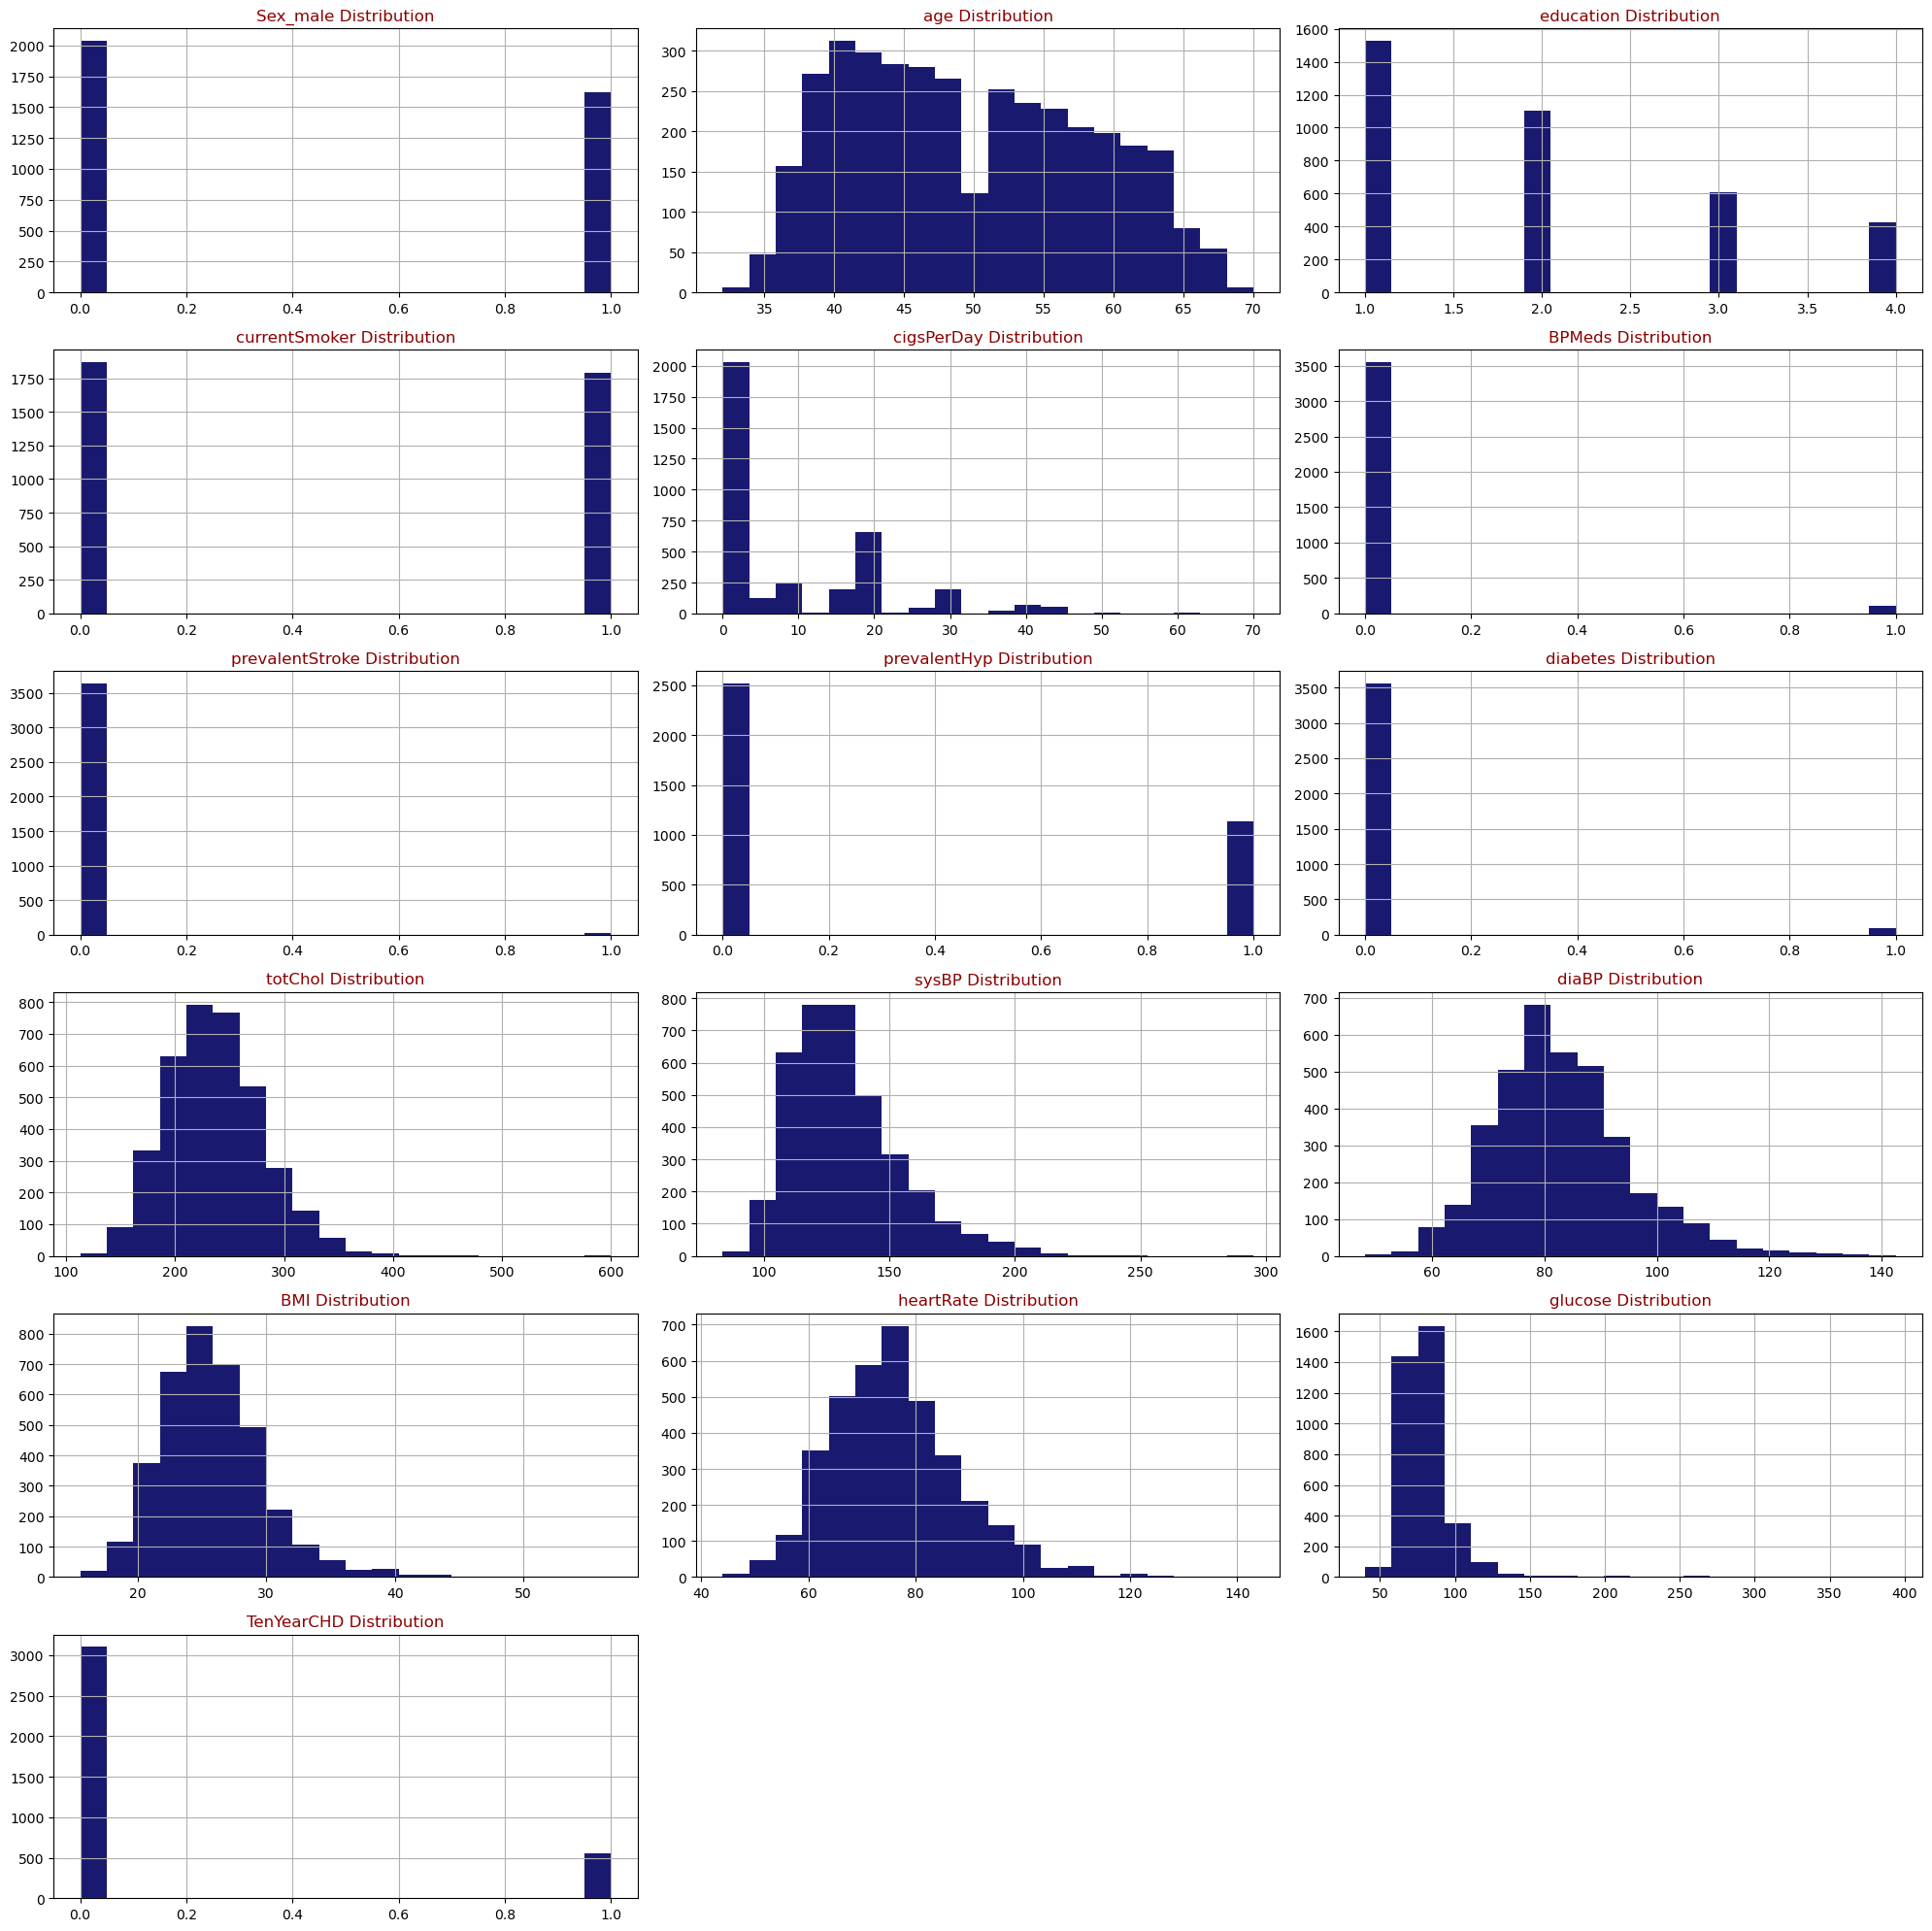

In [8]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(heart_df,heart_df.columns,6,3)

In [9]:
heart_df.TenYearCHD.value_counts()

TenYearCHD
0    3101
1     557
Name: count, dtype: int64

<Axes: xlabel='TenYearCHD', ylabel='count'>

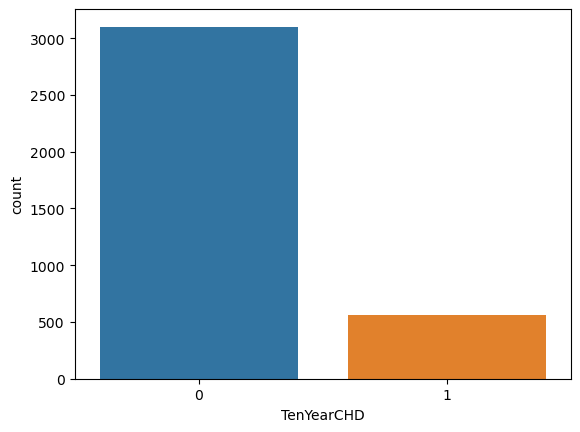

In [10]:
sn.countplot(x='TenYearCHD',data=heart_df)

There are 3179 patents with no heart disease and 572 patients with risk of heart disease.

/Users/lakrama/miniconda3/envs/torchtensor/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lakrama/miniconda3/envs/torchtensor/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lakrama/miniconda3/envs/torchtensor/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lakrama/miniconda3/envs/torchtensor/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: us

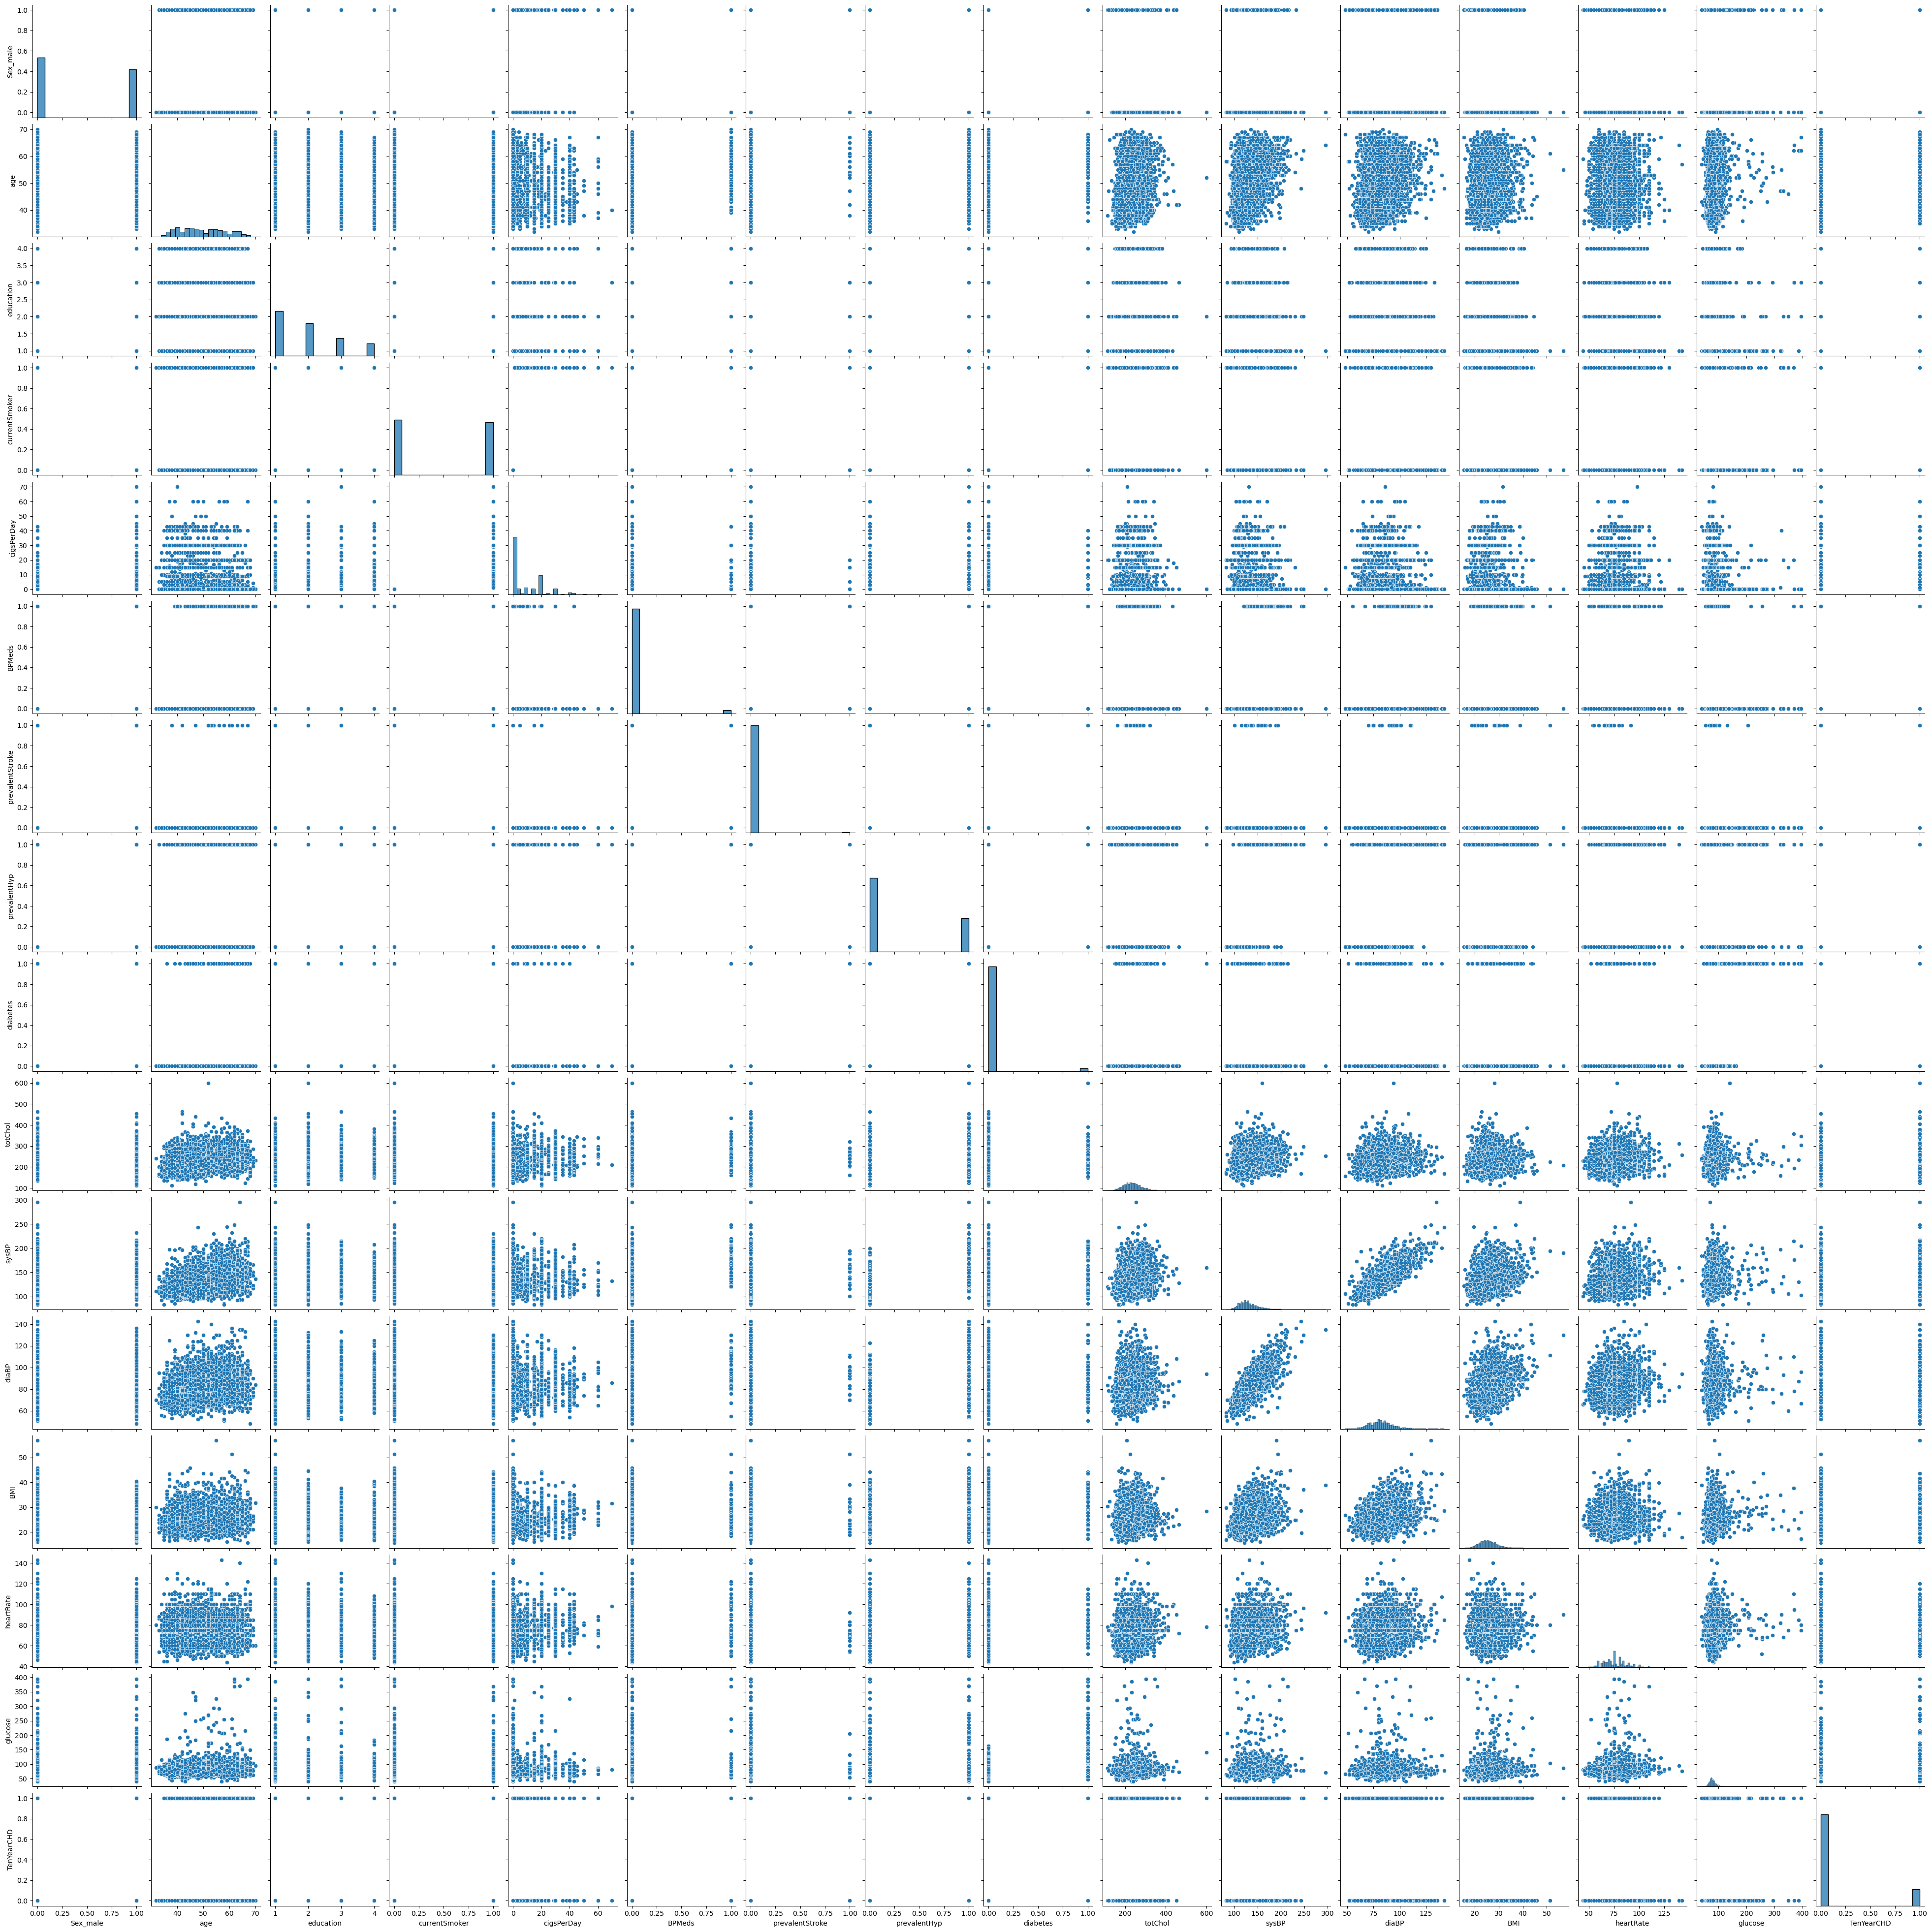

In [11]:
sn.pairplot(data=heart_df)

In [ ]:
heart_df.describe()

## <font color=RoyalBlue>Logistic Regression<font>

Logistic regression is a type of regression analysis in statistics used for prediction of outcome of a categorical dependent variable from a set of predictor or independent variables. In logistic regression the dependent variable is always binary. Logistic regression is mainly used to for prediction and also calculating the probability of success. 

In [12]:
from statsmodels.tools import add_constant as add_constant
heart_df_constant = add_constant(heart_df)
heart_df_constant.head()

,const,Sex_male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1.0,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1.0,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1.0,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [14]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols=heart_df_constant.columns[:-1]
model=sm.Logit(heart_df.TenYearCHD,heart_df_constant[cols])
result=model.fit()
result.summary()


Optimization terminated successfully.
         Current function value: 0.376500
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3658
Model:                          Logit   Df Residuals:                     3642
Method:                           MLE   Df Model:                           15
Date:                Tue, 30 Apr 2024   Pseudo R-squ.:                  0.1175
Time:                        22:23:22   Log-Likelihood:                -1377.2
converged:                       True   LL-Null:                       -1560.6
Covariance Type:            nonrobust   LLR p-value:                 6.676e-69
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.3282      0.715    -11.640      0.000      -9.730      -6.926
Sex_male            0.5553      0.109      5.093      0.000       0.342       0.769
age                 0.0635      0.007      9.509      0.000       0.050       0.077
education          -0.0478      0.049     -0.967      0.334      -0.145       0.049
currentSmoker       0.0716      0.157      0.457      0.648      -0.236       0.379
cigsPerDay          0.0179      0.006      2.872      0.004       0.006       0.030
BPMeds              0.1625      0.234      0.693      0.488      -0.297       0.622
prevalentStroke     0.6937      0.490      1.417      0.157      -0.266       1.653
prevalentHyp        0.2342      0.138      1.697      0.090      -0.036       0.505
diabetes            0.0392      0.316      0.124      0.901      -0.579       0.658
totChol             0.0023      0.001      2.070      0.038       0.000       0.005
sysBP               0.0154      0.004      4.044      0.000       0.008       0.023
diaBP              -0.0042      0.006     -0.646      0.518      -0.017       0.008
BMI                 0.0067      0.013      0.523      0.601      -0.018       0.032
heartRate          -0.0032      0.004     -0.771      0.441      -0.012       0.005
glucose             0.0071      0.002      3.190      0.001       0.003       0.012
===================================================================================
"""

The results above show some of the attributes with P value higher than the preferred alpha(5%) and thereby showing  low statistically significant relationship with the probability of heart disease. Backward elemination approach is used here to remove those attributes with highest Pvalue one at a time follwed by  running the regression repeatedly until all attributes have P Values less than 0.05.



### <font color=CornflowerBlue>Feature Selection: Backward elemination (P-value approach)<font>

In [18]:
def back_feature_elem (data_frame,dep_var,col_list):
    """ Takes in the dataframe, the dependent variable and a list of column names, runs the regression repeatedly eleminating feature with the highest
    P-value above alpha one at a time and returns the regression summary with all p-values below alpha"""

    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result=back_feature_elem(heart_df_constant,heart_df.TenYearCHD,cols)

/var/folders/r8/5wc8dngx7j55w_gyx0q8q2x80000gn/T/ipykernel_2880/2623851559.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if largest_pvalue[0]<(0.05):
/var/folders/r8/5wc8dngx7j55w_gyx0q8q2x80000gn/T/ipykernel_2880/2623851559.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if largest_pvalue[0]<(0.05):
/var/folders/r8/5wc8dngx7j55w_gyx0q8q2x80000gn/T/ipykernel_2880/2623851559.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

In [19]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3658
Model:                          Logit   Df Residuals:                     3651
Method:                           MLE   Df Model:                            6
Date:                Tue, 30 Apr 2024   Pseudo R-squ.:                  0.1148
Time:                        22:35:02   Log-Likelihood:                -1381.4
converged:                       True   LL-Null:                       -1560.6
Covariance Type:            nonrobust   LLR p-value:                 2.408e-74
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.1353      0.475    -19.213      0.000     -10.067      -8.203
Sex_male       0.5617      0.107      5.258      0.000       0.352       0.771
age            0.0660      0.006     10.267      0.000       0.053       0.079
cigsPerDay     0.0192      0.004      4.606      0.000       0.011       0.027
totChol        0.0023      0.001      2.031      0.042    8.01e-05       0.004
sysBP          0.0175      0.002      8.155      0.000       0.013       0.022
glucose        0.0073      0.002      4.343      0.000       0.004       0.011
==============================================================================
"""

#### <font color=darkblue>Logistic regression equation<font>

$$P=\hspace{.2cm}e^{\beta_0 + \beta_1 X_1}\hspace{.2cm}/\hspace{.2cm}1+e^{\beta_0 +\beta_1 X_1}$$

When all features plugged in:

$$logit(p) = log(p/(1-p))=\beta_0 +\beta_1\hspace{.1cm} *\hspace{.2cm} Sexmale\hspace{.2cm}+\beta_2\hspace{.1cm} * \hspace{.1cm}age\hspace{.2cm}+\hspace{.2cm}\beta_3\hspace{.1cm} *\hspace{.1cm} cigsPerDay\hspace{.2cm}+\hspace{.2cm}\beta_4 \hspace{.1cm}*\hspace{.1cm} totChol\hspace{.2cm}+\hspace{.2cm}\beta_5\hspace{.1cm} *\hspace{.1cm} sysBP\hspace{.2cm}+\hspace{.2cm}\beta_6\hspace{.1cm} *\hspace{.1cm} glucose\hspace{.2cm}$$



## <font color=RoyalBlue>Interpreting the results: Odds Ratio, Confidence Intervals and Pvalues<font>

In [20]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))


            CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const           0.000042       0.000274    0.000108   0.000
Sex_male        1.422325       2.161998    1.753586   0.000
age             1.054823       1.081727    1.068190   0.000
cigsPerDay      1.011106       1.027788    1.019413   0.000
totChol         1.000080       1.004491    1.002283   0.042
sysBP           1.013404       1.021977    1.017682   0.000
glucose         1.004004       1.010626    1.007310   0.000


 - **This fitted model shows that, holding all other features constant, the odds of getting diagnosed with heart disease for males (sex_male = 1)over that of  females (sex_male = 0) is exp(0.5815) = 1.788687. In terms of percent change, we can say that the odds for males are 78.8% higher than the odds for females.**
<br>
<br>

 - **The coefficient for age says that, holding all others constant, we will see 7% increase in the odds of getting diagnosed with CDH for a one year increase in age since exp(0.0655) = 1.067644.**
<br>
<br>
 - **Similarly , with every extra cigarette one smokes thers is a 2% increase in the odds of CDH.** 
<br>
<br>
 - **For Total cholosterol level and glucose level there is no significant change.**
<br>
<br>
 - **There is a 1.7% increase in odds for every unit increase in systolic Blood Pressure.**


### <font color=CornflowerBlue>Splitting data to train and test split<font>

In [21]:
import sklearn
new_features=heart_df[['age','Sex_male','cigsPerDay','totChol','sysBP','glucose','TenYearCHD']]
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5)

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [22]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

NameError: name 'x_train' is not defined

## <font color=RoyalBlue>Model Evaluation<font>

### <font color=CornflowerBlue>Model accuracy<font>

In [ ]:
sklearn.metrics.accuracy_score(y_test,y_pred)

####  <font color=DarkBlue>Accuracy of the model is 0.88<font>

### <font color=CornflowerBlue>Confusion matrix<font>

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

The confusion matrix shows 658+4 = 662 correct predictions and 88+1= 89 incorrect ones.

**<font color=DarkBlue>True Positives:**  4<font>

**<font color=DarkBlue>True Negatives:**  658<font>

**<font color=DarkBlue>False Positives:** 1 (*Type I error*)<font>

**<font color=DarkBlue>False Negatives:** 88 ( *Type II error*)<font>

In [ ]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

### <font color=CornflowerBlue>Model Evaluation - Statistics<font>

In [ ]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)


**From the above statistics it is clear that the model is highly specific than sensitive. The negative values are predicted more accurately than the positives.**

### <font color=CornflowerBlue>Predicted probabilities of  0 (No Coronary Heart Disease) and 1 ( Coronary Heart Disease: Yes)  for the test data with a default classification threshold of 0.5<font>


In [ ]:
y_pred_prob=logreg.predict_proba(x_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of no heart disease (0)','Prob of Heart Disease (1)'])
y_pred_prob_df.head()

### <font color=CornflowerBlue>Lower the threshold<font>

Since the model is predicting Heart disease too many type II errors is not advisable. A False Negative ( ignoring the probability of disease when there actualy is one) is more dangerous than a False Positive in this case. Hence inorder to increase the sensitivity,  threshold can be lowered.

In [ ]:
from sklearn.preprocessing import binarize
for i in range(1,5):
    cm2=0
    y_pred_prob_yes=logreg.predict_proba(x_test)
    y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(y_test,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')
    

### <font color=CornflowerBlue>ROC curve<font>

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

A common way to visualize the trade-offs of different thresholds is by using an ROC curve, a plot of the true positive rate (# true positives/ total # positives) versus the false positive rate (# false positives /
total # negatives) for all possible choices of thresholds. A model with good classification accuracy should have significantly more true positives than false positives at all thresholds. 

The optimum position for roc curve is towards the top left corner where the specificity and sensitivity are at optimum levels

### <font color=CornflowerBlue>Area Under The Curve (AUC)<font>

The area under the ROC curve quantifies model classification accuracy; the higher the area, the greater the disparity between true and false positives, and the stronger the model in classifying members of the training dataset. An area of 0.5 corresponds to a model that performs no better than random classification and a good classifier stays as far away from that  as possible. An area of 1 is ideal. The closer the AUC to 1 the better.

In [ ]:
sklearn.metrics.roc_auc_score(y_test,y_pred_prob_yes[:,1])


## <font color=RoyalBlue> Conclusions:</font>

<div class="alert alert-info">



<div class="panel-body">


 - **<font color=darkblue>All attributes selected after the elimination process show Pvalues lower than 5% and thereby suggesting significant role in the Heart disease prediction.</font>** 
<br>
<br>
 - **<font color=darkblue>Men seem to be more susceptible to heart disease than women.Increase in Age,number of cigarettes smoked per day and systolic Blood Pressure also show increasing odds of having heart disease.</font>**
 <br>
 <br>

 - **<font color=darkblue>Total cholesterol shows no significant change in the odds of CHD. This could be due to the presence of 'good cholesterol(HDL) in the total cholesterol reading.Glucose too causes a very negligible change in odds (0.2%)</font>**
 <br>
 <br>

 - **<font color=darkblue>The model predicted with 0.88 accuracy. The model is more specific than sensitive.</font>**
 <br>
 <br>

 - **<font color=darkblue>The Area under the ROC curve is 73.5 which is somewhat satisfactory.</font> **
 <br>
 <br>

 - ** <font color=darkblue>Overall model could be improved with more data.</font>**

</div>
</div>

## Appendix

http://www.who.int/mediacentre/factsheets/fs317/en/

#### Data Source References

https://www.kaggle.com/datasets/aasheesh200/framingham-heart-study-dataset